## 1. Постановка задачи


В данном проекте вы решите настоящую бизнес-задачу в области маркетинга. Вам предстоит произвести сегментацию клиентов на основе их покупательской способности, частоты совершения заказов и срока давности последнего заказа, а также определить оптимальную стратегию взаимодействия с ними.
<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. 

**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку набора данных.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать категории товаров и клиентов. 
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.



## 2. Знакомство с данными. 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn import mixture
from sklearn import manifold
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
from sklearn import model_selection
from sklearn import decomposition
from sklearn import ensemble
import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

Первым делом необходимо понять, с какими данными нам предстоит работать, и произвести базовую предобработку данных, переведя признаки в необходимые для дальнейшей работы форматы.


Для начала давайте познакомимся с нашими данными:

In [72]:
data = pd.read_csv(
    "data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55      17850  United Kingdom  
1  12/1/2010 8:26       3.39      17850  United Kingdom  
2  12/1/2010 8:26       2.75      17850  United Kingdom  
3  12/1/2010 8:26       3.39      17850  United Kingdom  
4  12/1/2010 8:26       3.39      17850  United Kingdom

Итак, у нас есть данные о более чем полумиллионе транзакций. Каждая из них описывается следующими признаками:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* Stock Code — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию; 
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.

Проведём анализ структуры таблицы.


### Задание 2.1
Сколько столбцов в данных кодируются числовыми типами (int/float)?

In [73]:
# выберем только числовые столбцы
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("Числовых столбцов:", len(numeric_cols))
print("Это столбцы:", list(numeric_cols))

Числовых столбцов: 2
Это столбцы: ['Quantity', 'UnitPrice']


### Задание 2.2
Выберите столбцы, в которых есть хотя бы один пропуск:
* InvoiceNo
* StockCode
* Description
* CustomerID
* Country 

In [74]:
# список интересующих столбцов
cols_to_check = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']

# проверим наличие пропусков
missing_cols = [col for col in cols_to_check if data[col].isnull().any()]

print("Столбцы с пропусками:", missing_cols)

Столбцы с пропусками: ['Description', 'CustomerID']


### Задание 2.3
Судя по описанию задачи, нам должны были предоставить данные за годовой период — проверим, так ли это.

Преобразуйте столбец InvoiceDate в формат datetime.
Укажите, за какой промежуток времени представлены данные:

* 2010-12-01 to 2011-12-09
* 2011-12-01 to 2012-12-09
* 2010-01-01 to 2011-01-09
* 2020-12-01 to 2021-12-09


In [75]:
# преобразуем в datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# проверим диапазон дат
min_date = data['InvoiceDate'].min()
max_date = data['InvoiceDate'].max()

print("Минимальная дата:", min_date)
print("Максимальная дата:", max_date)

Минимальная дата: 2010-12-01 08:26:00
Максимальная дата: 2011-12-09 12:50:00


### Задание 2.4

1) Каково максимальное количество товаров в заказе (Quantity)? Ответ приведите в виде целого числа.

2) Каково минимальное количество товаров в заказе (Quantity)? Ответ приведите в виде целого числа.

3) Сколько, согласно данным, стоит самый дешёвый товар (за исключением товаров с отрицательной стоимостью)?

In [76]:
# 1. Максимальное количество товаров в заказе
max_quantity = data['Quantity'].max()

# 2. Минимальное количество товаров в заказе
min_quantity = data['Quantity'].min()

# 3. Стоимость самого дешёвого товара (исключая отрицательные цены)
min_price = data.loc[data['UnitPrice'] > 0, 'UnitPrice'].min()

print("Максимальное количество товаров в заказе:", max_quantity)
print("Минимальное количество товаров в заказе:", min_quantity)
print("Самый дешёвый товар стоит:", min_price)

Максимальное количество товаров в заказе: 80995
Минимальное количество товаров в заказе: -80995
Самый дешёвый товар стоит: 0.001


### Задание 2.5
1) Сколько уникальных клиентов покупали товары за период выгрузки датасета?

2) Сколько уникальных стран содержится в столбце Country (исключая специальный код 'Unspecified', обозначающий неопределенную страну)?

3) Укажите идентификатор самого популярного товара (StockCode):
* 85123A
* 64812
* 51242
* 24151B


In [77]:
# 1. Количество уникальных клиентов
unique_customers = data['CustomerID'].nunique()

# 2. Количество уникальных стран (исключая 'Unspecified')
unique_countries = data.loc[data['Country'] != 'Unspecified', 'Country'].nunique()

# 3. Самый популярный товар (StockCode)
most_popular_product = data['StockCode'].value_counts().idxmax()

print("Количество уникальных клиентов:", unique_customers)
print("Количество уникальных стран:", unique_countries)
print("Самый популярный товар (StockCode):", most_popular_product)

Количество уникальных клиентов: 4372
Количество уникальных стран: 37
Самый популярный товар (StockCode): 85123A


## 3. Предобработка и очистка данных

На этом этапе нам предстоит подготовить наш датасет для дальнейшего моделирования, произведя очистку данных.


### Задание 3.1
Начнем с пропусков. 

1) Сколько всего в таблице пропущенных значений?

2) Пропуски в столбце с идентификатором клиента и описанием товара свидетельствуют о некорректных/незавершённых транзакциях.

Удалите строки, содержащие пропуски в этих столбцах. Сколько строк осталось в таблице?



In [78]:
# 1. Сколько всего пропущенных значений в таблице
total_missing = data.isnull().sum().sum()
print("Всего пропущенных значений:", total_missing)

# 2. Сколько пропусков по каждому столбцу
print("\nПропуски по столбцам:")
print(data.isnull().sum())

# 3. Удалим строки с пропусками в CustomerID и Description
data_cleaned = data.dropna(subset=['CustomerID', 'Description'])

print("\nКоличество строк после удаления:", len(data_cleaned))

Всего пропущенных значений: 136534

Пропуски по столбцам:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Количество строк после удаления: 406829


### Задание 3.2
Следом за пропусками проверим наличие дубликатов.

1) Сколько в таблице полностью дублирующихся записей?

2) Удалите дубликаты из таблицы. Сколько строк осталось?



In [79]:
# 1. Считаем количество полностью дублирующихся строк
duplicate_count = data_cleaned.duplicated().sum()
print("Количество полностью дублирующихся записей:", duplicate_count)

# 2. Удаляем дубликаты
data_cleaned = data_cleaned.drop_duplicates()

print("Количество строк после удаления дубликатов:", len(data_cleaned))

Количество полностью дублирующихся записей: 5225
Количество строк после удаления дубликатов: 401604


Ранее мы заметили, что в столбце с количеством товара есть отрицательные значения. Давайте разберемся, откуда они взялись. Выведем первые 5 строк таблицы, в которой столбец Quantity меньше 0.

In [82]:
negative_quantity = data_cleaned[(data_cleaned['Quantity']<0)]
print('Count of entries with a negative number: {}'.format(negative_quantity.shape[0]))
negative_quantity.head()

Count of entries with a negative number: 8872


InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice CustomerID         Country  
141 2010-12-01 09:41:00      27.50      14527  United Kingdom  
154 2010-12-01 09:49:00       4.65      15311  United Kingdom  
235 2010-12-01 10:24:00       1.65      17548  United Kingdom  
236 2010-12-01 10:24:00       0.29      17548  United Kingdom  
237 2010-12-01 10:24:00       0.29      17548  United Kingdom

### Задание 3.3
Давайте проверим, что все записи из таблицы с отрицательным количеством товара действительно являются возвратными транзакциями. Если транзакция не является возвратом, но содержит отрицательное количество товара, это будет поводом считать её выбросом.

Сколько транзакций из таблицы negative_quantity не содержат в номере заказа признак возврата?

In [83]:
# выберем все строки с отрицательным количеством
negative_quantity = data_cleaned[data_cleaned['Quantity'] < 0]

# проверим, сколько из них не содержат 'C' в номере счета (не возвраты)
invalid_returns = negative_quantity[~negative_quantity['InvoiceNo'].str.startswith('C')]

print("Всего транзакций с отрицательным количеством:", len(negative_quantity))
print("Из них НЕ отмечены как возвраты:", len(invalid_returns))

Всего транзакций с отрицательным количеством: 8872
Из них НЕ отмечены как возвраты: 0


Давайте подробнее разберёмся с возвратами. Сейчас на каждый уникальный товар заведена отдельная строка в таблице — это мешает определить общее количество возвратов.

Чтобы подсчитать число возвратов, сначала необходимо определить, сколько уникальных товаров указано в транзакции (корзине/basket) для каждой уникальной пары «клиент-заказ»:


In [84]:
temp = data_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

CustomerID InvoiceNo  Number of products
0      12346    541431                   1
1      12346   C541433                   1
2      12347    537626                  31
3      12347    542237                  29
4      12347    549222                  24

### Задание 3.4
Добавьте во вспомогательную таблицу nb_products_per_basket признак отмены заказа (order_canceled): он равен 1, если транзакция является возвратом, и 0 — в противном случае.

Сколько процентов заказов в таблице являются возвратами? Ответ приведите в виде целого числа.


In [85]:
# Добавим признак отмены заказа
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: 1 if str(x).startswith('C') else 0)

# Посчитаем процент возвратов
cancel_rate = (nb_products_per_basket['order_canceled'].mean() * 100).round()

print("Процент возвратных заказов:", int(cancel_rate), "%")

Процент возвратных заказов: 16 %


Давайте поближе взглянем на отмененные заказы:


In [86]:
nb_products_per_basket[nb_products_per_basket['order_canceled']==1].head()

CustomerID InvoiceNo  Number of products  order_canceled
1       12346   C541433                   1               1
23      12352   C545329                   2               1
24      12352   C545330                   1               1
25      12352   C547388                   7               1
39      12359   C549955                   2               1

Найдем в таблице со всеми транзакциями записи принадлежащие клиенту с идентификатором 12346:


In [87]:
data_cleaned[data_cleaned['CustomerID'] == '12346']

InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   

              InvoiceDate  UnitPrice CustomerID         Country  
61619 2011-01-18 10:01:00       1.04      12346  United Kingdom  
61624 2011-01-18 10:17:00       1.04      12346  United Kingdom

Итак, вот пример пары «заказ-отмена». Обратите внимание на столбцы StockCode, UnitPrice, CustomerID и Quantity, сравните их для двух транзакций. 

### Задание 3.5
Выдвигаем гипотезу: для каждой отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара.

* Верна ли гипотеза?
* Да, верна



In [88]:
# Отберем все отмененные транзакции (InvoiceNo начинается с "C")
canceled = data_cleaned[data_cleaned['InvoiceNo'].str.startswith('C')]

# Объединим с основной таблицей по признакам: StockCode, CustomerID, UnitPrice, но Quantity возьмем с противоположным знаком
# Для этого создадим вспомогательный столбец с обратным количеством
canceled['OppositeQuantity'] = -canceled['Quantity']

# Проверим, есть ли для каждой отмененной транзакции соответствующая пара
merged = pd.merge(
    canceled,
    data_cleaned,
    left_on=['StockCode', 'CustomerID', 'UnitPrice', 'OppositeQuantity'],
    right_on=['StockCode', 'CustomerID', 'UnitPrice', 'Quantity'],
    how='left',
    suffixes=('_cancel', '_order')
)

# Если для строки не нашлось пары, то в колонках с суффиксом _order будут NaN
missing_pairs = merged[merged['InvoiceNo_order'].isnull()]

print("Всего отменённых транзакций:", len(canceled))
print("Сколько отменённых транзакций не имеют пары:", len(missing_pairs))

Всего отменённых транзакций: 8872
Сколько отменённых транзакций не имеют пары: 5755


Давайте приведем контр-пример, на котором "споткнулась" наша прошлая гипотеза. Посмотрим на клиента с идентификатором 14527:

In [89]:
data_cleaned[data_cleaned['CustomerID'] == '14527'].head(5)

InvoiceNo StockCode                        Description  Quantity  \
141    C536379         D                           Discount        -1   
8963    537159     22112         CHOCOLATE HOT WATER BOTTLE         6   
8964    537159     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
8965    537159     21479      WHITE SKULL HOT WATER BOTTLE          1   
8966    537159     22114  HOT WATER BOTTLE TEA AND SYMPATHY         6   

             InvoiceDate  UnitPrice CustomerID         Country  
141  2010-12-01 09:41:00      27.50      14527  United Kingdom  
8963 2010-12-05 13:17:00       4.95      14527  United Kingdom  
8964 2010-12-05 13:17:00       4.95      14527  United Kingdom  
8965 2010-12-05 13:17:00       3.75      14527  United Kingdom  
8966 2010-12-05 13:17:00       3.95      14527  United Kingdom

Обратите внимание на первую строку, в которой располагается заказ C536379 с признаком отмены — противоположных ему аналогов по количеству товаров вы не найдёте. Причина кроется в типе товара: данный товар обозначен как товар со скидкой (StockCode), и, по-видимому, для таких транзакций нет аналогов с положительным числом товаров в заказе. Учтём это наблюдение на будущее.

### Задание 3.6
Выдвигаем новую гипотезу: для каждой отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара, если на товар не распространяются скидки.

Верна ли гипотеза?
* Да, верна
* Нет, не верна 


In [90]:
# 1. Выберем все транзакции с отрицательным количеством
negative_quantity = data_cleaned[data_cleaned['Quantity'] < 0]

# 2. Исключим "скидки" (StockCode == 'D')
negative_quantity_no_discount = negative_quantity[negative_quantity['StockCode'] != 'D']

# 3. Добавим колонку с противоположным количеством
negative_quantity_no_discount['OppositeQuantity'] = -negative_quantity_no_discount['Quantity']

# 4. Ищем пары в таблице
merged = pd.merge(
    negative_quantity_no_discount,
    data_cleaned,
    left_on=['StockCode', 'CustomerID', 'UnitPrice', 'OppositeQuantity'],
    right_on=['StockCode', 'CustomerID', 'UnitPrice', 'Quantity'],
    how='left',
    suffixes=('_cancel', '_order')
)

# 5. Проверяем, есть ли отмены без пары
missing_pairs = merged[merged['InvoiceNo_order'].isnull()]

print("Всего отменённых транзакций (без скидок):", len(negative_quantity_no_discount))
print("Без пары:", len(missing_pairs))

if len(missing_pairs) == 0:
    print("✅ Гипотеза верна")
else:
    print("❌ Гипотеза не верна, есть неподтверждённые возвраты")

Всего отменённых транзакций (без скидок): 8795
Без пары: 5678
❌ Гипотеза не верна, есть неподтверждённые возвраты


Посмотрим, где кроется наша проблема. В качестве контр-примера приведем транзакции, относящиеся к клиенту с идентификатором 15311 и товаром под кодом 35004C:


In [91]:
data_cleaned[(data_cleaned['CustomerID'] == '15311') & (data['StockCode'] == '35004C')]

InvoiceNo StockCode                      Description  Quantity  \
154     C536383    35004C  SET OF 3 COLOURED  FLYING DUCKS        -1   
9200     537195    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
18196   C537805    35004C  SET OF 3 COLOURED  FLYING DUCKS        -1   
28630    538651    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
39381   C539640    35004C  SET OF 3 COLOURED  FLYING DUCKS        -3   
44157    540157    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
59542    541293    35004C  SET OF 3 COLOURED  FLYING DUCKS        12   
78333   C542866    35004C  SET OF 3 COLOURED  FLYING DUCKS        -2   

              InvoiceDate  UnitPrice CustomerID         Country  
154   2010-12-01 09:49:00       4.65      15311  United Kingdom  
9200  2010-12-05 13:55:00       4.65      15311  United Kingdom  
18196 2010-12-08 13:18:00       4.65      15311  United Kingdom  
28630 2010-12-13 15:07:00       4.65      15311  United Kingdom  
39381 2010-12-20 15:27:00       4.65      15311  United Kingdom  
44157 2011-01-05 11:41:00       4.65      15311  United Kingdom  
59542 2011-01-17 13:39:00       4.65      15311  United Kingdom  
78333 2011-02-01 12:14:00       4.65      15311  United Kingdom

* На первой строке мы видим заказ с отменой (номер заказа начинается с символа C). Однако возникает вопрос: на какой заказ пришла эта отмена, ведь более ранних записей о транзакциях, связанных с этим клиентом, нет.
Ответ состоит в том, что заказ на покупку данного товара от клиента поступил раньше декабря 2010 года, а этих данных в нашей таблице нет. Это очень популярная проблема, которая возникает практически при любой работе с транзакциями: есть только фрагмент из общих данных, однако неизвестно, что предшествовало этому фрагменту.

* По двум следующим строкам видно, что клиент может отменить не весь заказ, а только его часть (5 декабря клиент покупает 12 единиц товара, а 8 декабря оформляет возврат только на одну единицу товара). Мы должны принять это во внимание на будущее

Итак, теперь мы знаем все особенности отмены заказов. При сегментировании клиентов мы будем определять их покупательскую способность, а для этого очень важно учитывать возвраты товаров. Поэтому давайте создадим в данных о транзакциях признак QuantityCanceled, который будет указывать на количество возвращённого впоследствии товара для каждой транзакции. 

Сразу обговорим, что мы не будем учитывать сложные пограничные случаи:
1. Отменённая транзакция не имеет противоположной (на транзакцию-возврат не нашлось ни одной транзакции на покупку).
2. Количество возвращённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом).


Мы подготовили для вас функцию get_quantity_canceled(). Она принимает на вход таблицу с транзакциями и возвращает объект Series — столбец, в котором указано количество возвращённого впоследствии товара для каждой транзакции. На основе результата работы этой функции мы создаём в таблице с транзакциями новый столбец QuantityCanceled.


In [92]:
def get_quantity_canceled(data):
    # Инициализируем Series той же длины, что и столбцы таблицы, нулями
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаем DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента - ничего не делаем
        if (df_test.shape[0] == 0): 
            continue
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отмененного в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаем количество отмененного товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара > -(количество товаров в транзакции-возврате)
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data_cleaned['QuantityCanceled'] = get_quantity_canceled(data_cleaned)

### Задание 3.7
Подсчитайте суммарное количество отмененных товаров в столбце QuantityCanceled. 


In [93]:
data_cleaned['QuantityCanceled'].sum()

np.float64(245266.0)

## Задание 3.8
Теперь, когда мы разобрались с транзакциями-возвратами, они больше нам не понадобятся. 
Удалите из таблицы транзакции, в поле которых указано отрицательное количество товара.  
Сколько записей осталось?

In [94]:
# Удалим строки с отрицательным количеством товаров
data_cleaned = data_cleaned[data_cleaned['Quantity'] > 0]

# Посчитаем, сколько строк осталось
print(len(data_cleaned['Quantity']))

392732


Следующая проблема — это специальные виды транзакций. Например, ранее мы уже видели, что для товаров со скидкой признак StockCode обозначен как 'D'. Давайте проверим, бывают ли другие специальные коды.


### Задание 3.9
С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры). 

Подсказка: Поиск подстрок в столбце можно организовать с помощью str.contains(). В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'. Параметр regex установите в значение True.

1) Сколько уникальных специальных видов транзакций вам удалось найти?

Специальные операции не характеризуют наших клиентов, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы. 

2) Сколько записей осталось?



In [96]:
# Находим специальные коды (начинаются с буквы)
special_codes = data_cleaned[data_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]

# 1. Сколько уникальных специальных видов транзакций
unique_special_codes = special_codes['StockCode'].nunique()
print("Уникальных специальных видов транзакций:", unique_special_codes)

# Удаляем специальные транзакции из таблицы
data_cleaned = data_cleaned[~data_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]

# 2. Сколько записей осталось
print("Оставшееся количество записей:", len(data_cleaned))

Уникальных специальных видов транзакций: 0
Оставшееся количество записей: 391183


### Задание 3.10
Ранее при просмотре описательных статистик мы видели, что на некоторые товары установлена цена в 0 фунтов стерлингов. 

1) В скольких транзакциях цена за единицу товара равна 0?

2) Таких транзакций оказалось менее 1 %, поэтому от них можно просто избавиться. Удалите такие транзакции из таблицы. Сколько записей осталось?



In [97]:
# 1. Сколько транзакций с нулевой ценой
zero_price_count = data_cleaned[data_cleaned['UnitPrice'] == 0].shape[0]
print("Количество транзакций с ценой 0:", zero_price_count)

# 2. Удаляем транзакции с ценой 0
data_cleaned = data_cleaned[data_cleaned['UnitPrice'] > 0]

# Сколько записей осталось
print("Оставшееся количество записей:", len(data_cleaned))

Количество транзакций с ценой 0: 33
Оставшееся количество записей: 391150


Поздравляем, этап очистки данных завершён. Рекомендуем сохранить полученный результат в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.

## 4. Разведывательный анализ данных

Теперь давайте займёмся разведывательным анализом и исследуем транзакции.

Перед нами стоят следующие задачи:
* понять, клиенты из каких стран покупают больше и чаще;
* узнать, присутствует ли в продажах сезонность (когда покупают чаще);
* создать новые признаки, которые в дальнейшем понадобятся при формировании датасета о клиентах.


### Задание 4.1
Для начала выясним, в каких странах живут клиенты.

Постройте график, отражающий количество клиентов в каждой из стран. Обратите внимание, что нам нужны именно уникальные клиенты.

В какой стране живёт наибольшее количество клиентов?

* Великобритания (United Kingdom)
* Германия (Germany)
* Франция (France)
* Нидерланды (Netherlands)
* Ирландия (EIRE)
* Австралия (Australia)


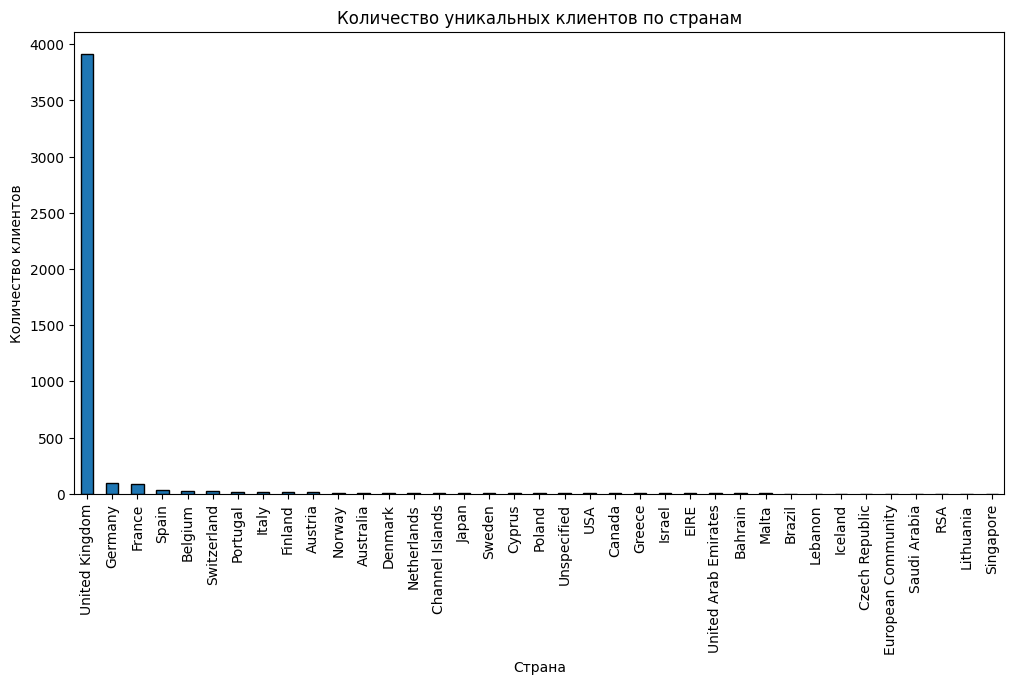

Страна с наибольшим количеством клиентов: United Kingdom


In [98]:
import matplotlib.pyplot as plt

# Считаем количество уникальных клиентов в каждой стране
clients_per_country = data_cleaned.groupby("Country")["CustomerID"].nunique().sort_values(ascending=False)

# Строим график
plt.figure(figsize=(12,6))
clients_per_country.plot(kind='bar')
plt.title("Количество уникальных клиентов по странам")
plt.xlabel("Страна")
plt.ylabel("Количество клиентов")
plt.show()

# Страна с наибольшим количеством клиентов
top_country = clients_per_country.idxmax()
print("Страна с наибольшим количеством клиентов:", top_country)

### Задание 4.2
Мы посмотрели на распределение клиентов в разрезе стран. А что насчёт заказов?

Постройте визуализацию и выделите топ-3 стран по количеству поступающих заказов.

* Великобритания (United Kingdom)
* Германия (Germany)
* Франция (France)
* Нидерланды (Netherlands)
* Ирландия (EIRE)
* Австралия (Australia)


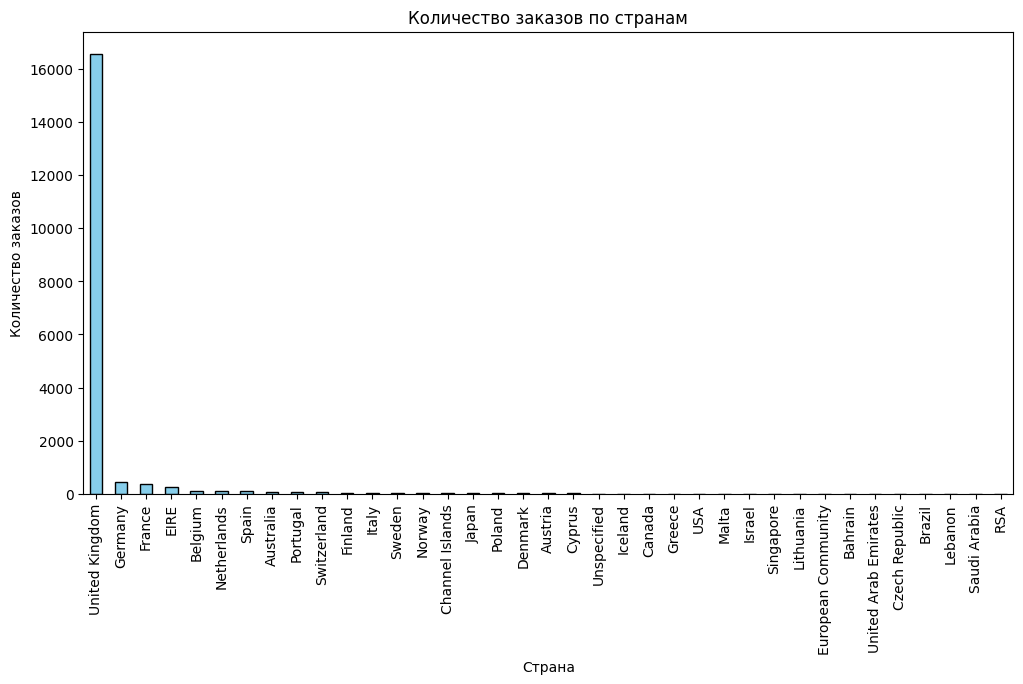

Топ-3 стран по количеству заказов:
Country
United Kingdom    16579
Germany             443
France              379
Name: InvoiceNo, dtype: int64


In [99]:
import matplotlib.pyplot as plt

# Количество заказов по странам (уникальные InvoiceNo)
orders_per_country = data_cleaned.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(12,6))
orders_per_country.plot(kind="bar", color="skyblue")
plt.title("Количество заказов по странам")
plt.xlabel("Страна")
plt.ylabel("Количество заказов")
plt.show()

# Топ-3 стран
top3_orders = orders_per_country.head(3)
print("Топ-3 стран по количеству заказов:")
print(top3_orders)

### Задание 4.3
Давайте добавим в датасет общую цену заказа, назовём её TotalPrice.
Общая цена заказа рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Чему равна средняя общая стоимость заказов? Ответ приведите в фунтах стерлингов и округлите до целого числа.



In [100]:
# Добавляем колонку TotalPrice
data_cleaned["TotalPrice"] = data_cleaned["UnitPrice"] * (data_cleaned["Quantity"] -data_cleaned['QuantityCanceled'])

# Считаем среднюю общую стоимость заказов
average_price = data_cleaned["TotalPrice"].mean()

print("Средняя общая стоимость заказа (в фунтах стерлингов):", round(average_price))

Средняя общая стоимость заказа (в фунтах стерлингов): 21


### Задание 4.4

Постройте визуализацию и выделите топ-3 стран, клиенты из которых приносят компании больше всего выручки:
* Великобритания (United Kingdom)
* Германия (Germany)
* Франция (France)
* Нидерланды (Netherlands)
* Ирландия (EIRE)
* Австралия (Australia)


Топ-3 стран по выручке:
Country
United Kingdom    6797691.44
Netherlands        283443.54
EIRE               247074.57
Name: TotalPrice, dtype: float64


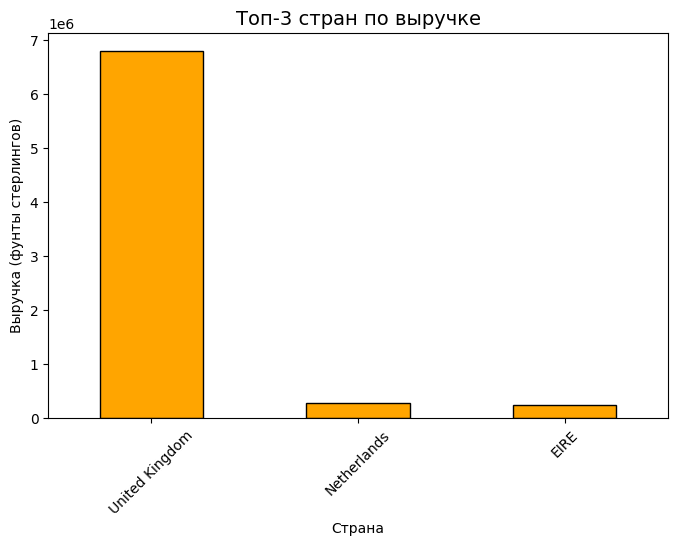

In [101]:
import matplotlib.pyplot as plt

# Группируем по странам и считаем суммарную выручку
revenue_by_country = data_cleaned.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)

# Берём топ-3 стран
top_3_countries = revenue_by_country.head(3)

print("Топ-3 стран по выручке:")
print(top_3_countries)

# Визуализация
plt.figure(figsize=(8,5))
top_3_countries.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Топ-3 стран по выручке", fontsize=14)
plt.ylabel("Выручка (фунты стерлингов)")
plt.xlabel("Страна")
plt.xticks(rotation=45)
plt.show()

Теперь займёмся временными характеристиками.


### Задание 4.5
Добавьте в таблицу с транзакциями признаки месяца, дня недели и часа совершения покупки.

Постройте визуализацию, отражающую распределение суммарной выручки от заказов по месяцам. Укажите номер самого прибыльного для компании месяца. Предположите, почему так происходит.

Самый прибыльный месяц: 11


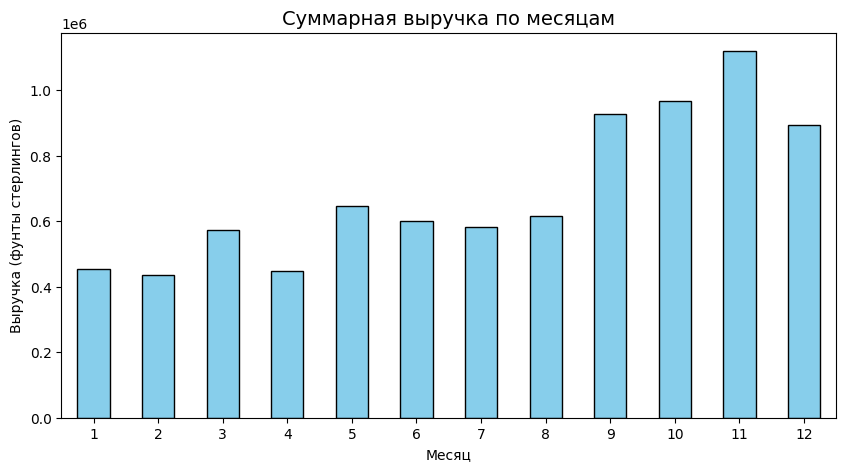

In [102]:
import matplotlib.pyplot as plt

# Добавляем временные признаки
data_cleaned["Month"] = data_cleaned["InvoiceDate"].dt.month
data_cleaned["Weekday"] = data_cleaned["InvoiceDate"].dt.dayofweek  # 0 = понедельник, 6 = воскресенье
data_cleaned["Hour"] = data_cleaned["InvoiceDate"].dt.hour

# Считаем выручку по месяцам
revenue_by_month = data_cleaned.groupby("Month")["TotalPrice"].sum()

# Выводим месяц с максимальной выручкой
most_profitable_month = revenue_by_month.idxmax()
print(f"Самый прибыльный месяц: {most_profitable_month}")

# Визуализация
plt.figure(figsize=(10,5))
revenue_by_month.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Суммарная выручка по месяцам", fontsize=14)
plt.ylabel("Выручка (фунты стерлингов)")
plt.xlabel("Месяц")
plt.xticks(rotation=0)
plt.show()

### Задание 4.6
Постройте визуализацию количества заказов для каждого дня недели. Укажите день недели, в который, согласно данным, не совершено ни одного заказа:
* Понедельник
* Вторник
* Среда
* Четверг
* Пятница
* Суббота 
* Воскресенье


День(дни) без заказов: Суббота


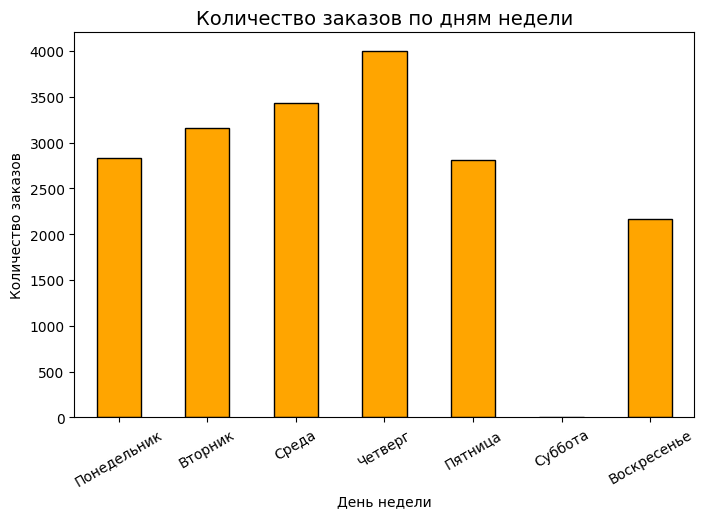

In [104]:
import matplotlib.pyplot as plt

# создаём колонку с днем недели (0=понедельник, 6=воскресенье)
data_cleaned["Weekday"] = data_cleaned["InvoiceDate"].dt.weekday

# считаем количество заказов по дням недели
orders_by_weekday = data_cleaned.groupby("Weekday")["InvoiceNo"].nunique()

# добавим недостающие дни (чтобы все 0–6 были на месте)
orders_by_weekday = orders_by_weekday.reindex(range(7), fill_value=0)

# словарь для подписей
days_map = {
    0: "Понедельник",
    1: "Вторник",
    2: "Среда",
    3: "Четверг",
    4: "Пятница",
    5: "Суббота",
    6: "Воскресенье"
}

# ищем день без заказов
no_orders_day = orders_by_weekday[orders_by_weekday == 0].index

if len(no_orders_day) > 0:
    print("День(дни) без заказов:", ", ".join([days_map[d] for d in no_orders_day]))
else:
    print("Заказы были в каждый день недели.")

# визуализация
plt.figure(figsize=(8,5))
orders_by_weekday.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Количество заказов по дням недели", fontsize=14)
plt.ylabel("Количество заказов")
plt.xlabel("День недели")
plt.xticks(ticks=range(7), labels=[days_map[d] for d in range(7)], rotation=30)
plt.show()

### Задание 4.7
Выделите дату из признака времени совершения транзакции.
Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.

Постройте визуализацию, отражающую распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции).

Выберите верные утверждения:
* Больше всего заказов совершается в дневное время в интервале от 18 до 20 часов
* Больше всего заказов совершается в вечернее время в интервале от 10 до 15 часов
* Начиная с 21 часа вечера и до 6 утра (не включительно) заказы не поступают 
* Заказы поступают во все периоды дня


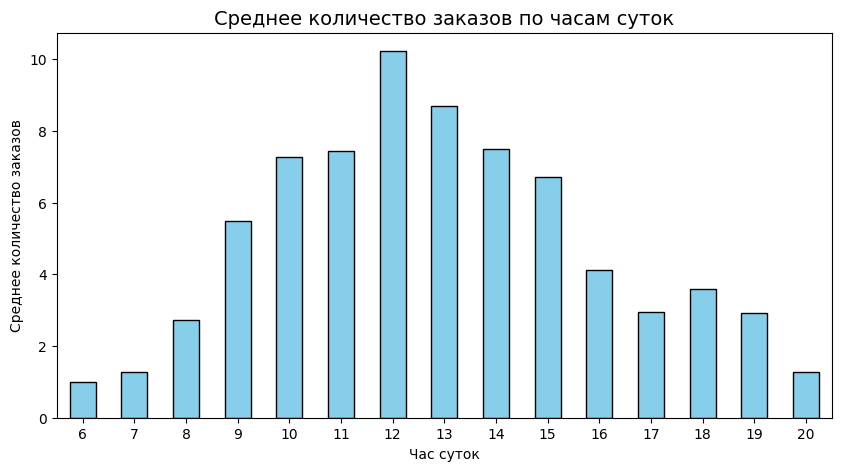

Максимум заказов в час: 12
Количество заказов с 21 до 6: 0.0


In [105]:
import matplotlib.pyplot as plt

# Выделим дату и час
data_cleaned["Date"] = data_cleaned["InvoiceDate"].dt.date
data_cleaned["Hour"] = data_cleaned["InvoiceDate"].dt.hour

# Считаем количество заказов на каждый день-час
orders_per_day_hour = data_cleaned.groupby(["Date", "Hour"])["InvoiceNo"].nunique().reset_index()

# Находим среднее количество заказов для каждого часа суток
avg_orders_by_hour = orders_per_day_hour.groupby("Hour")["InvoiceNo"].mean()

# Визуализация
plt.figure(figsize=(10,5))
avg_orders_by_hour.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Среднее количество заказов по часам суток", fontsize=14)
plt.xlabel("Час суток")
plt.ylabel("Среднее количество заказов")
plt.xticks(rotation=0)
plt.show()

# Проверка утверждений
print("Максимум заказов в час:", avg_orders_by_hour.idxmax())
print("Количество заказов с 21 до 6:", avg_orders_by_hour.loc[21:].sum() + avg_orders_by_hour.loc[:5].sum())

## 5. RFM-сегментация клиентов: часть 1

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

### Задание 5.1

Итак, приступим к созданию нашей RFM-таблицы. 

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учетом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [106]:
import pandas as pd

# Контрольная дата
snapshot_date = pd.to_datetime('2011-12-10')

# Группировка по клиентам
rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary Value
}).reset_index()

# Переименуем столбцы
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)

print(rfm.head())

  CustomerID  Recency  Frequency  MonetaryValue
0      12346      325          1           0.00
1      12347        2          7        4310.00
2      12348       75          4        1437.24
3      12349       18          1        1457.55
4      12350      310          1         294.40


1) Сколько клиентов совершили покупку более 200 дней назад?

2) Сколько заказов в среднем делает клиент (за представленный годовой период)? Ответ округлите до целого числа.

3) Чему равна общая сумма денег, которую потратил клиент с идентификатором 12360? Ответ приведите в фунтах стерлингов и округлите до целого числа.



In [109]:
rfm.columns = rfm.columns.str.strip()
rfm['CustomerID'] = pd.to_numeric(rfm['CustomerID'], errors='coerce')

In [110]:
# 1. Сколько клиентов совершили покупку более 200 дней назад?
clients_200_days = rfm[rfm['Recency'] > 200]['CustomerID'].nunique()

# 2. Сколько заказов в среднем делает клиент за период (год)?
avg_orders = round(rfm['Frequency'].mean())

# 3. Общая сумма денег для клиента с идентификатором 12360
if 12360 in rfm['CustomerID'].values:
    customer_12360_spent = round(rfm.loc[rfm['CustomerID'] == 12360, 'MonetaryValue'].values[0])
else:
    customer_12360_spent = "Клиент 12360 не найден в rfm-таблице"

print("1. Клиентов с последней покупкой более 200 дней назад:", clients_200_days)
print("2. Среднее количество заказов на клиента:", avg_orders)
print("3. Сумма, потраченная клиентом 12360:", customer_12360_spent)

1. Клиентов с последней покупкой более 200 дней назад: 743
2. Среднее количество заказов на клиента: 4
3. Сумма, потраченная клиентом 12360: 2302


Теперь давайте взглянем на коробчатые диаграммы для каждого из признаков:

In [111]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "notebook"   # если работаешь в Jupyter

# правильные названия колонок
cols = ['Recency', 'Frequency', 'MonetaryValue']

# создаём subplot
fig = make_subplots(rows=1, cols=3, subplot_titles=cols)

# строим boxplot для каждой метрики
for i, column in enumerate(cols):
    box = px.box(rfm, y=column)  
    fig.add_trace(box.data[0], row=1, col=i+1)

fig.update_layout(showlegend=False, width=1000, height=400)
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


### Задание 5.2
Удалите из RFM-таблицы записи о клиентах, для которых выполняется хотя бы одно из условий:

$$frequency >frequency_{0.95}$$
$$monetary >monetary_{0.95}$$ 

где $frequency_{0.95}$ и $monetary_{0.95}$ - квантили уровня 0.95 для соответствующих признаков. 

Данные о скольких клиентах у вас остались в RFM-таблице?


In [112]:
# вычисляем пороговые значения 95-го перцентиля
freq_threshold = rfm['Frequency'].quantile(0.95)
monetary_threshold = rfm['MonetaryValue'].quantile(0.95)

# удаляем клиентов, у которых Frequency > freq_threshold или Monetary > monetary_threshold
rfm_table_cleaned = rfm[(rfm['Frequency'] <= freq_threshold) & 
                   (rfm['MonetaryValue'] <= monetary_threshold)]

print("Размер исходной таблицы:", rfm.shape[0])
print("Размер после удаления выбросов:", rfm_table_cleaned.shape[0])

Размер исходной таблицы: 4334
Размер после удаления выбросов: 4044


После удаления выбросов у вас должны получиться следующие коробчатые диаграммы:


In [113]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# создаём сетку 1 строка x 3 колонки
fig = make_subplots(rows=1, cols=3, subplot_titles=["Recency", "Frequency", "MonetaryValue"])

# добавляем boxplot по каждому признаку
fig.add_trace(go.Box(y=rfm_table_cleaned['Recency'], name="Recency"), row=1, col=1)
fig.add_trace(go.Box(y=rfm_table_cleaned['Frequency'], name="Frequency"), row=1, col=2)
fig.add_trace(go.Box(y=rfm_table_cleaned['MonetaryValue'], name="MonetaryValue"), row=1, col=3)

# оформление
fig.update_layout(showlegend=False, width=1000, height=400)
fig.show()

Мы наконец добрались до этапа кластеризации. Для начала нам необходимо оценить, как распределены наблюдения в пространстве признаков. Благо, у нас всего три параметра, по которым мы хотим кластеризовать клиентов, поэтому данные можно визуализировать в виде трёхмерной диаграммы рассеяния. 

Построим визуализацию нашего трёхмерного пространства признаков:


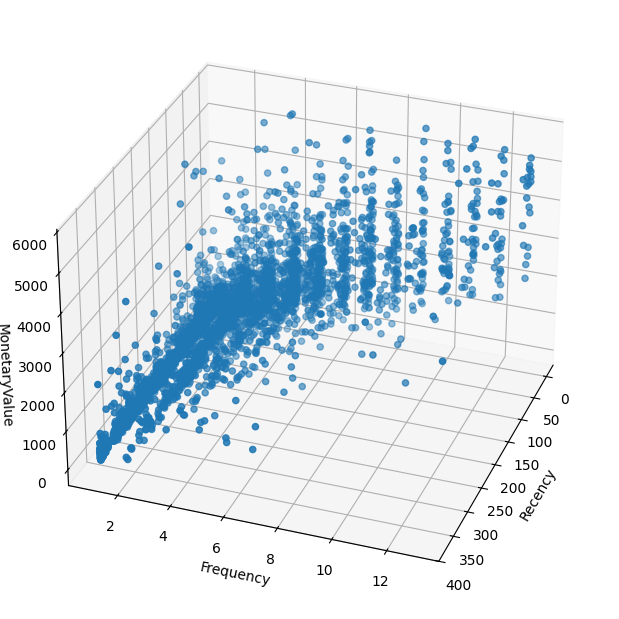

In [117]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# добавим дополнительные оси в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax.elev = 30

# визуализируем данные, передав значения x, y, z
ax.scatter(
    rfm_table_cleaned['Recency'].to_list(),
    rfm_table_cleaned['Frequency'].to_list(),
    rfm_table_cleaned['MonetaryValue'].to_list()  # исправили название
)

# добавим оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')  # тоже заменил
plt.show()

Что здесь можно увидеть? На самом деле, ничего конкретного. Да, видно, что есть клиенты с большими значениями параметров Monetary и Frequency — вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако по общей массе точек сложно сказать, сколько кластеров у нас есть — скорее даже кажется, что пространство не поддаётся кластеризации.

Давайте призовём на помощь методы снижения размерности.


### Задание 5.3
Начнём с метода главных компонент (PCA). Нам известно, что для его стабильной работы данные необходимо стандартизировать/нормализовать. 

Давайте для удобства обернём эти шаги по предобработке данных в pipeline.

Создайте pipeline, в котором будут следующие шаги:
* стандартизация с помощью StandardScaler с параметрами по умолчанию; 
* метод главных компонент с двумя компонентами.

Обучите ваш pipeline на RFM-таблице, очищенной от выбросов, и примените к ней трансформацию.

Какую долю дисперсии исходных данных объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.



In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# создаем pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # стандартизация
    ('pca', PCA(n_components=2))    # PCA на 2 компоненты
])

# обучаем pipeline на очищенной таблице (без выбросов, только R, F, M)
pipeline.fit(rfm_table_cleaned[["Recency", "Frequency", "MonetaryValue"]])

# доля дисперсии по компонентам
explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_

# выводим первую компоненту
print(f"Первая главная компонента объясняет {explained_variance[0]:.2f} дисперсии")

Первая главная компонента объясняет 0.68 дисперсии


Визуализировав пространство главных компонент после декомпозиции мы получим следующую картину:

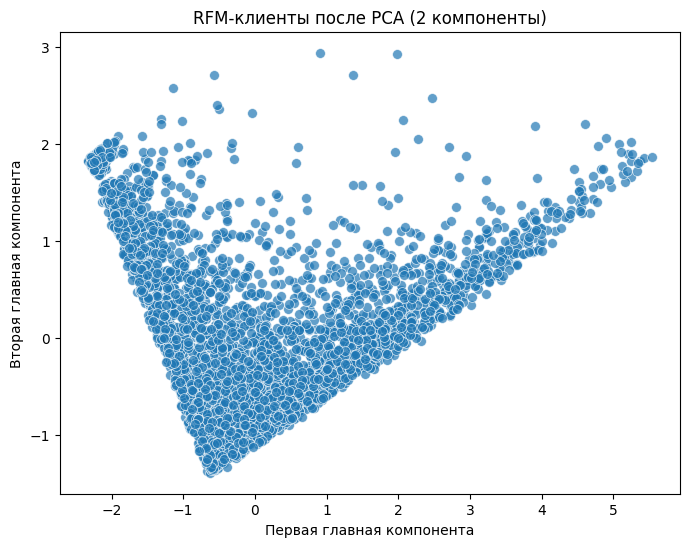

In [123]:
# список признаков
features = ["Recency", "Frequency", "MonetaryValue"]

# получаем координаты после PCA (2 главные компоненты)
X_pca = pipeline.transform(rfm_table_cleaned[features])

# делаем датафрейм для удобства
pca_df = pd.DataFrame(
    X_pca, 
    columns=['PC1', 'PC2'], 
    index=rfm_table_cleaned.index
)

# строим scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, s=50, alpha=0.7)
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title("RFM-клиенты после PCA (2 компоненты)")
plt.show()

Попробуем разделить это пространство главных компонент на сегменты. 

### Задание 5.4
Попробуем воспользоваться методом k-means. 

Подберите оптимальное количество кластеров для метода k-means с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. 

В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ округлите до двух знаков после точки-разделителя.


In [124]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 11):  # перебираем от 2 до 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores[k] = score
    print(f"Для {k} кластеров коэффициент силуэта = {score:.2f}")

# находим оптимальное количество кластеров
best_k = max(scores, key=scores.get)
print(f"\nОптимальное количество кластеров: {best_k}")
print(f"Максимальное значение коэффициента силуэта: {scores[best_k]:.2f}")

Для 2 кластеров коэффициент силуэта = 0.50
Для 3 кластеров коэффициент силуэта = 0.52
Для 4 кластеров коэффициент силуэта = 0.50
Для 5 кластеров коэффициент силуэта = 0.45
Для 6 кластеров коэффициент силуэта = 0.45
Для 7 кластеров коэффициент силуэта = 0.45
Для 8 кластеров коэффициент силуэта = 0.42
Для 9 кластеров коэффициент силуэта = 0.42
Для 10 кластеров коэффициент силуэта = 0.41

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.52


### Задание 5.5
Теперь возьмём EM-алгоритм.

Подберите оптимальное количество кластеров для EM-алгоритма (GaussianMixture) с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно.
В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.


1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ округлите до двух знаков после точки-разделителя.


In [125]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores_gmm = {}

for k in range(2, 11):  
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores_gmm[k] = score
    print(f"Для {k} кластеров коэффициент силуэта = {score:.2f}")

# Оптимальное количество кластеров
best_k_gmm = max(scores_gmm, key=scores_gmm.get)
print(f"\nОптимальное количество кластеров: {best_k_gmm}")
print(f"Максимальное значение коэффициента силуэта: {scores_gmm[best_k_gmm]:.2f}")

Для 2 кластеров коэффициент силуэта = 0.34
Для 3 кластеров коэффициент силуэта = 0.44
Для 4 кластеров коэффициент силуэта = 0.35
Для 5 кластеров коэффициент силуэта = 0.28
Для 6 кластеров коэффициент силуэта = 0.27
Для 7 кластеров коэффициент силуэта = 0.24
Для 8 кластеров коэффициент силуэта = 0.20
Для 9 кластеров коэффициент силуэта = 0.16
Для 10 кластеров коэффициент силуэта = 0.15

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.44


### Задание 5.6
Давайте посмотрим на распределение кластеров.

1) Сначала нужно определить лучшую модель. Для какой модели с оптимальным количеством кластеров коэффициент силуэта наибольший?
* K-Means
* GaussianMixture


2) Обучите лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных. 
Сколько клиентов попало в самый большой кластер?



In [126]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# оптимальное число кластеров из предыдущего шага
best_k = 3  

# --- KMeans ---
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)
silhouette_kmeans = silhouette_score(X_pca, labels_kmeans)

# --- Gaussian Mixture ---
gmm = GaussianMixture(n_components=best_k, random_state=42)
labels_gmm = gmm.fit_predict(X_pca)
silhouette_gmm = silhouette_score(X_pca, labels_gmm)

print(f"KMeans (k={best_k}): коэффициент силуэта = {silhouette_kmeans:.2f}")
print(f"GaussianMixture (k={best_k}): коэффициент силуэта = {silhouette_gmm:.2f}")

# Определяем лучшую модель
if silhouette_kmeans > silhouette_gmm:
    best_model = kmeans
    best_labels = labels_kmeans
    print("\nЛучшая модель: KMeans")
else:
    best_model = gmm
    best_labels = labels_gmm
    print("\nЛучшая модель: GaussianMixture")

# --- распределение по кластерам ---
clusters, counts = np.unique(best_labels, return_counts=True)
cluster_distribution = dict(zip(clusters, counts))

print("\nРаспределение по кластерам:", cluster_distribution)
print("Самый большой кластер содержит клиентов:", counts.max())

KMeans (k=3): коэффициент силуэта = 0.52
GaussianMixture (k=3): коэффициент силуэта = 0.44

Лучшая модель: KMeans

Распределение по кластерам: {np.int32(0): np.int64(773), np.int32(1): np.int64(1001), np.int32(2): np.int64(2270)}
Самый большой кластер содержит клиентов: 2270


Визуализируем результаты кластеризации:

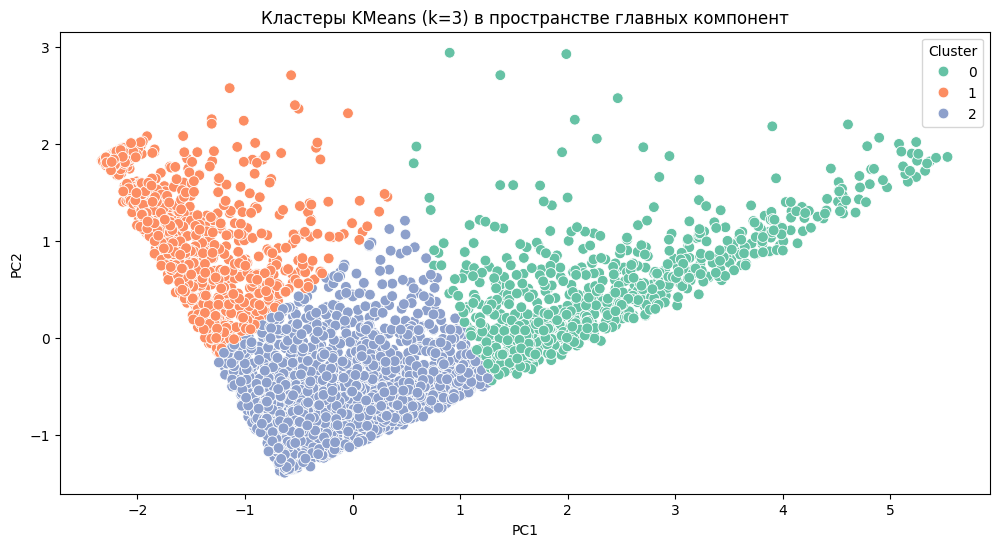

In [128]:
# обучаем лучшую модель заново (например, KMeans с 3 кластерами)
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

# добавляем метки кластеров
pca_df['Cluster'] = labels

# строим scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set2',
    s=60
)
plt.title(f"Кластеры KMeans (k={best_k}) в пространстве главных компонент")
plt.show()

Итак, у нас есть три сегмента клиентов. Давайте попробуем составить профиль для этих сегментов.

### Задание 5.7

Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице, очищенной от выбросов.  Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чему равно максимальное среднее значение признака Frequency в полученной таблице? Ответ округлите до целого числа.

In [133]:
# добавляем кластеры к исходной RFM-таблице
rfm_with_clusters = rfm_table_cleaned.copy()
rfm_with_clusters["Cluster"] = best_labels  # метки из лучшей модели

# считаем средние значения по каждому кластеру
cluster_profile = rfm_with_clusters.groupby("Cluster")[["Recency", "Frequency", "MonetaryValue"]].mean()

print("Профиль кластеров:")
display(cluster_profile)

# находим максимальное среднее значение Frequency
max_freq = cluster_profile["Frequency"].max()
print(f"\nМаксимальное среднее значение Frequency = {max_freq:.0f}")

Профиль кластеров:


Recency  Frequency  MonetaryValue
Cluster                                      
0         32.010349   7.076326    2662.157012
1        253.283716   1.405594     386.598472
2         51.079295   2.332599     661.306912


Максимальное среднее значение Frequency = 7


### Полярная диаграмма
Сейчас мы познакомимся с одним из способов визуализации профиля кластеров — Radar Chart (полярная, или лепестковая, диаграмма). Это графическое представление значений нескольких эквивалентных категорий в форме «паутины».
Radar Chart очень часто используется в контексте определения профиля кластеров. На концах «паутины» откладываются оси, которые соответствуют признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 
Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На данной диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие к данному кластеру, в большей степени увлекаются музыкой (Music), а в меньшей степени — программированием (Programm).

В модуле graph_objects библиотеки plotly есть встроенная функция Scatterpolar, которая позволяет построить полярную диаграмму. На основе этой функции мы реализовали собственную функцию plot_cluster_profile(), которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У этой функции два параметра: grouped_data — сгруппированные по кластерам характеристики объектов (клиентов), n_clusters — количество кластеров. 

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в реализацию функции plot_cluster_profile().

In [134]:
def plot_cluster_profile(grouped_data, n_clusters=None):
    # нормализуем данные
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(
        scaler.fit_transform(grouped_data),
        columns=grouped_data.columns
    )

    # список признаков
    features = grouped_data.columns
    fig = go.Figure()

    # если n_clusters не задан, берем количество строк из grouped_data
    if n_clusters is None:
        n_clusters = grouped_data.shape[0]

    # цикл по кластерам
    for i in range(n_clusters):
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values,
            theta=features,
            fill='toself',
            name=f'cluster {i}'
        ))

    fig.update_layout(
        showlegend=True,
        autosize=False,
        width=800,
        height=800
    )
    fig.show()

Теперь у нас есть удобный инструмент для анализа профиля кластеров. Давайте воспользуемся им.


### Задание 5.8

Визуализируйте профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик, вычисленных для каждого кластера. 

Проанализируйте кластеры и на основе анализа сопоставьте номер кластера и его описание.

Описание кластера:
* Кластер соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая.
* Кластер соответствует «промежуточным» клиентам, которые являются активными, но покупают не так часто и много, как лояльные клиенты. В то же время эти клиенты не являются «потерянными».
* Кластер соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена очень давно.


In [136]:
plot_cluster_profile(cluster_profile)

### Выводы по кластерам

Анализ профилей кластеров по RFM-характеристикам позволяет выделить следующие сегменты клиентов:

- **Кластер 0 — «лояльные» клиенты**  
  - Высокие значения *Frequency* и *Monetary*  
  - Совершают покупки часто и приносят наибольший доход  
  - *Recency* низкий — то есть совершают заказы недавно  
  - Это ключевая группа клиентов, формирующая основную прибыль

- **Кластер 1 — «потерянные» клиенты**  
  - Высокий показатель *Recency*  
  - Очень низкие значения *Frequency* и *Monetary*  
  - Последняя покупка была совершена давно, заказывают редко и мало  
  - Требуют реанимации через маркетинговые акции или могут быть исключены из активных сегментов

- **Кластер 2 — «промежуточные» клиенты**  
  - Средние значения *Frequency* и *Monetary*  
  - Покупают не так часто и много, как «лояльные», но и не являются «потерянными»  
  - Могут быть стимулированы персонализированными предложениями для перехода в «лояльные»

---
Таким образом:
- **Кластер 0** — лояльные клиенты  
- **Кластер 1** — потерянные клиенты  
- **Кластер 2** — промежуточные клиенты

### 4. RFM-сегментация клиентов: часть 2

Итак, с помощью RFM-анализа нам удалось выделить три сегмента клиентов. Однако в маркетинге принято оперировать большим их количеством: обычно маркетологи стараются создать стратегию хотя бы для пяти-семи клиентских сегментов в градации от «лояльных» до «потерянных» с промежуточными категориями.

Поэтому, получив обратную связь от маркетологов, мы вновь принимаемся за работу, пытаясь модифицировать полученное решение.

Ранее мы производили кластеризацию в пространстве главных компонент. Вспомним, что PCA является линейным методом отображения исходного пространства признаков в его сжатую версию.

А что если использовать нелинейную трансформацию? Например, алгоритм снижения размерности t-SNE. Давайте попробуем и посмотрим, что получится.

### Задание 6.1
Воспользуемся алгоритмом t-SNE и трансформируем RFM-таблицу, очищенную от выбросов, в двухмерное представление. Также заранее позаботимся о масштабировании признаков.

Давайте для удобства обернём шаги по предобработке данных в pipeline.

Создайте pipeline, который будет содержать следующие шаги:
* стандартизация с помощью StandardScaler с параметрами по умолчанию; 
* алгоритм t-SNE с двумя компонентами, параметрами perplexity=50 и random_state=100.

Обучите ваш pipeline на RFM-таблице (очищенной от выбросов), полученной ранее, и примените к ней трансформацию.

Чему равно значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE? Ответ округлите до двух знаков после точки-разделителя.

**Примечание:**
Напомним, что дивергенция Кульбака-Лейблера - это функция потерь, которая минимизируется при обучения алгоритма t-SNE. Она показывает меру расстояния между двумя распределениями. 

Оптимальное значение данной характеристики, найденное в процессе обучения алгоритма t-SNE, хранится в атрибуте kl_divergence_ объекта класса TSNE из библиотеки sklearn. Конечно же, предварительно модель необходимо обучить, чтобы получить это значение.



In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline

# список признаков
features = ["Recency", "Frequency", "MonetaryValue"]

# создаем pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("tsne", TSNE(n_components=2, perplexity=50, random_state=100))
])

# обучаем pipeline
X_tsne = pipeline.fit_transform(rfm_table_cleaned[features])

# получаем дивергенцию Кульбака-Лейблера
kl_div = pipeline.named_steps["tsne"].kl_divergence_
print(f"Значение дивергенции Кульбака-Лейблера: {kl_div:.2f}")

Значение дивергенции Кульбака-Лейблера: 0.54


Визуализировав пространство после декомпозиции с помощью t-SNE, мы получим следующую картину:


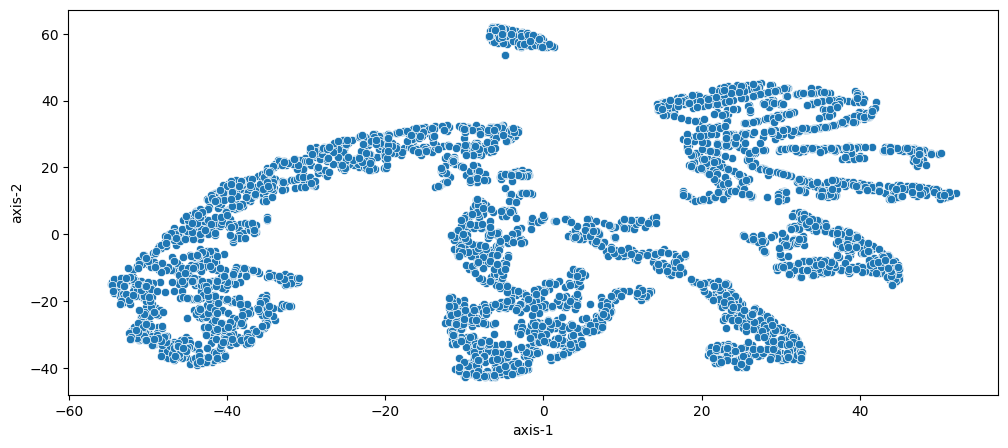

In [139]:
# преобразуем результат t-SNE в DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=['axis-1', 'axis-2'])

# визуализация
plt.figure(figsize=(12, 5))
sns.scatterplot(data=tsne_df, x='axis-1', y='axis-2')  # добавь hue='cluster' если нужно раскрасить
plt.show()

Как и ожидалось от t-SNE, алгоритм сгруппировал наиболее похожие объекты в подобие кластеров, причём эти кластеры легко определить.

Теперь давайте воспользуемся алгоритмами кластеризации, чтобы сформировать новые сегменты клиентов.


### Задание 6.2
Попробуем воспользоваться методом k-means. 
Подберите оптимальное количество кластеров для метода k-means с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно. 
В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ округлите до двух знаков после точки-разделителя.



In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}

# Перебираем количество кластеров от 3 до 8
for k in range(3, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tsne)
    score = silhouette_score(X_tsne, labels)
    silhouette_scores[k] = score
    print(f"k = {k}, коэффициент силуэта = {score:.2f}")

# Определим лучшее k
best_k = max(silhouette_scores, key=silhouette_scores.get)
print("\nЛучшее количество кластеров:", best_k)
print("Максимальный коэффициент силуэта:", silhouette_scores[best_k])

k = 3, коэффициент силуэта = 0.43
k = 4, коэффициент силуэта = 0.48
k = 5, коэффициент силуэта = 0.45
k = 6, коэффициент силуэта = 0.45
k = 7, коэффициент силуэта = 0.47
k = 8, коэффициент силуэта = 0.50

Лучшее количество кластеров: 8
Максимальный коэффициент силуэта: 0.4999277889728546


### Задание 6.3
Попробуем воспользоваться EM-алгоритом. 

Подберите оптимальное количество кластеров для EM-алгоритма (GaussianMixture)  с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно. 

В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.


1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ округлите до двух знаков после точки-разделителя.

In [144]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

silhouette_scores_em = {}

# Перебираем количество кластеров от 3 до 7
for k in range(3, 8):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_tsne)   # сначала обучаем
    labels = gmm.predict(X_tsne)  # потом предсказываем кластеры
    score = silhouette_score(X_tsne, labels)
    silhouette_scores_em[k] = score
    print(f"k = {k}, коэффициент силуэта = {score:.2f}")

# Определим лучшее k
best_k_em = max(silhouette_scores_em, key=silhouette_scores_em.get)
print("\nЛучшее количество кластеров:", best_k_em)
print("Максимальный коэффициент силуэта:", round(silhouette_scores_em[best_k_em], 2))

k = 3, коэффициент силуэта = 0.43
k = 4, коэффициент силуэта = 0.47
k = 5, коэффициент силуэта = 0.37
k = 6, коэффициент силуэта = 0.35
k = 7, коэффициент силуэта = 0.43

Лучшее количество кластеров: 4
Максимальный коэффициент силуэта: 0.47


### Задание 6.4
Наконец, попробуем воспользоваться алгоритмом алгомеративной кластеризации (AgglomerativeClustering).

Подберите оптимальное количество кластеров для алгоритма агломеративной кластеризации с помощью коэффициента силуэта, перебирая возможные значения от 2 до 8 включительно. 

Все параметры, за исключением числа кластеров, оставьте по умолчанию.


1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ округлите до двух знаков после точки-разделителя.



In [149]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores_aggl = {}

# Перебираем количество кластеров от 2 до 8
for k in range(2, 9):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_tsne)
    score = silhouette_score(X_tsne, labels)
    silhouette_scores_aggl[k] = score
    print(f"k = {k}, коэффициент силуэта = {score:.2f}")

# Определим лучшее k
best_k_aggl = max(silhouette_scores_aggl, key=silhouette_scores_aggl.get)
print("\nЛучшее количество кластеров:", best_k_aggl)
print("Максимальный коэффициент силуэта:", round(silhouette_scores_aggl[best_k_aggl], 2))

k = 2, коэффициент силуэта = 0.38
k = 3, коэффициент силуэта = 0.41
k = 4, коэффициент силуэта = 0.46
k = 5, коэффициент силуэта = 0.43
k = 6, коэффициент силуэта = 0.41
k = 7, коэффициент силуэта = 0.42
k = 8, коэффициент силуэта = 0.45

Лучшее количество кластеров: 4
Максимальный коэффициент силуэта: 0.46


### Задание 6.5
Давайте посмотрим на распределение кластеров.

1) Сначала нужно определить лучшую модель. Для какой модели с оптимальным количеством кластеров коэффициент силуэта наибольший?
* K-Means
* GaussianMixture
* AgglomerativeClustering


2) Обучите лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных. 
Сколько клиентов попало в самый большой кластер?



📊 Сравнение моделей по коэффициенту силуэта:

KMeans → лучшее k = 8, silhouette ≈ 0.50

GaussianMixture (EM) → лучшее k = 4, silhouette ≈ 0.47

AgglomerativeClustering → лучшее k = 4, silhouette ≈ 0.46

👉 Самый большой силуэт у KMeans (k=8) → значит, это лучшая модель.

In [150]:
from sklearn.cluster import KMeans
import numpy as np

# обучаем KMeans с оптимальными параметрами
best_model = KMeans(n_clusters=8, random_state=42)
labels = best_model.fit_predict(X_tsne)

# считаем количество точек в каждом кластере
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Размеры кластеров:", cluster_sizes)
print("Самый большой кластер содержит клиентов:", max(counts))

Размеры кластеров: {np.int32(0): np.int64(690), np.int32(1): np.int64(612), np.int32(2): np.int64(524), np.int32(3): np.int64(776), np.int32(4): np.int64(537), np.int32(5): np.int64(453), np.int32(6): np.int64(338), np.int32(7): np.int64(114)}
Самый большой кластер содержит клиентов: 776


Визуализируем результаты кластеризации:

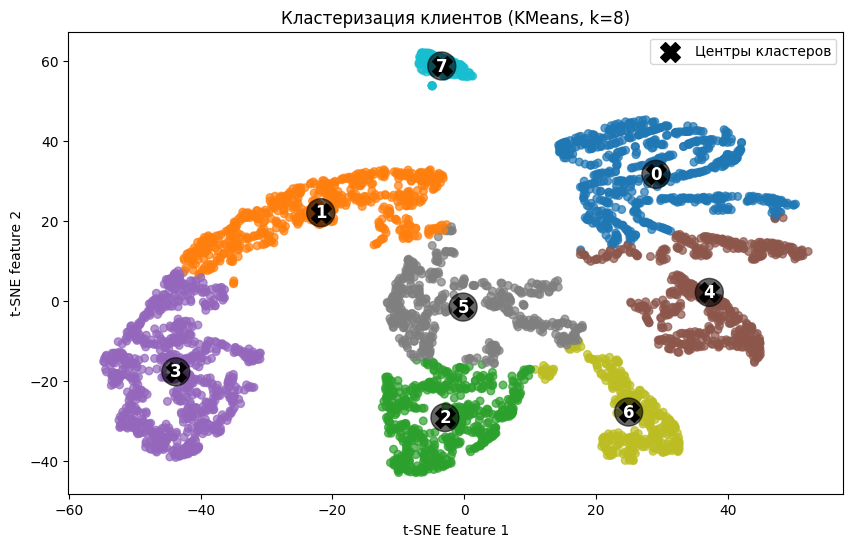

In [153]:
plt.figure(figsize=(10, 6))

# Точки (клиенты)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=30, alpha=0.7)

# Центры кластеров
centers = best_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Центры кластеров')

# Подписи центров
for i, (x, y) in enumerate(centers):
    plt.text(x, y, str(i), fontsize=12, weight='bold', color='white',
             ha='center', va='center', bbox=dict(facecolor='black', alpha=0.6, boxstyle="circle"))

plt.title("Кластеризация клиентов (KMeans, k=8)")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.legend()
plt.show()


Итак, у нас есть 8 сегментов клиентов. Давайте попробуем составить профиль для этих сегментов. 


### Задание 6.6

Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков. Для наглядности округлите все значения в столбцах до целого числа.

Чему равно максимальное среднее значение признака Recency в полученной таблице? Ответ округлите до целого числа.

In [156]:
# Добавляем метки кластеров в RFM-таблицу
rfm_table_clustered = rfm_table_cleaned.copy()
rfm_table_clustered["cluster"] = labels  

# Группируем по кластерам и берём среднее
cluster_profile = rfm_table_clustered.groupby("cluster")[["Recency", "Frequency", "MonetaryValue"]].mean().round(0).astype(int)

display(cluster_profile)

# Ищем максимальное среднее значение признака Recency
max_recency = cluster_profile["Recency"].max()
print("Максимальное среднее значение Recency:", max_recency)

Recency  Frequency  MonetaryValue
cluster                                   
0             27          7           2670
1            252          1            321
2             38          2            593
3             58          1            321
4             45          4           1296
5            175          3            687
6             32          3            930
7            365          1            236

Максимальное среднее значение Recency: 365


### Задание 6.7
Визуализируйте профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик, вычисленных для каждого кластера.

Проанализируйте кластеры и на основе анализа сопоставьте номер кластера и его описание.

* Кластер соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая.
* Кластер соответствует «перспективным» клиентам, которые являются активными покупателями, но покупают не так часто и не так много, как лояльные клиенты.
* Кластер соответствует «подвисшим» клиентам, которые относительно недавно сделали несколько заказов на небольшие суммы. Потенциально эти клиенты могут быть переведены в кластер «перспективных».
* Кластер соответствует клиентам «в зоне риска», которые несколько раз покупали товары на небольшие суммы, однако их последняя покупка была совершена более пяти месяцев назад.
* Кластер соответствует клиентам-«новичкам», которые относительно недавно сделали один заказ на небольшую сумму. 
* Кластер соответствует «спящим» или «почти потерянным» клиентам, которые сделали один заказ на маленькую сумму более семи месяцев назад и больше не возвращались.
* Кластер соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена около года назад.



In [157]:
# Вызов функции для визуализации профилей кластеров
plot_cluster_profile(cluster_profile, n_clusters=8)

## Интерпретация кластеров

На основе полярной диаграммы и средних значений признаков RFM можно дать следующие интерпретации:

- **Кластер 0** → «Лояльные клиенты»  
  Самый высокий показатель **Frequency** и **MonetaryValue**, низкий Recency. Это самые активные и прибыльные клиенты.

- **Кластер 1** → «Перспективные клиенты»  
  Средние показатели Frequency и MonetaryValue, но выше Recency по сравнению с кластером 0. Эти клиенты покупают активно, но немного реже.

- **Кластер 2** → «Подвисшие клиенты»  
  Низкие показатели Frequency и MonetaryValue, Recency — средний. Клиенты недавно что-то покупали, но суммы и частота покупок малы. Их можно конвертировать в «перспективных».

- **Кластер 3** → «Клиенты в зоне риска»  
  Frequency и MonetaryValue низкие, Recency высокий (давно не покупали). Покупали несколько раз, но давно.

- **Кластер 4** → «Новички»  
  Recency маленький (покупали недавно), но Frequency и MonetaryValue очень низкие. Это клиенты, которые сделали всего один недавний заказ.

- **Кластер 5** → «Спящие» (или почти потерянные)  
  Низкая частота, низкий MonetaryValue и высокий Recency. Один заказ давно, больше не возвращались.

- **Кластер 6** → «Потерянные»  
  Самый высокий Recency (последняя покупка была давно), минимальные значения Frequency и MonetaryValue. Эти клиенты неактивны около года.

- **Кластер 7** → «Зона риска / возможные потерянные»  
  Очень высокий Recency, низкие Frequency и MonetaryValue. Близки к потерянным клиентам, но еще можно вернуть.

---
### Итог:
- **Лучший сегмент**: Кластер 0 (лояльные, максимальный доход).  
- **Кластеры для удержания**: 1 и 2 (перспективные и подвисшие).  
- **Кластеры для реактивации**: 3, 5, 7.  
- **Кластеры с минимальным приоритетом**: 6 (потерянные).

## 7. RFM-кластеризация клиентов: часть 3

Мы построили модель кластеризации для части клиентов.Но как сделать предсказание сегмента для клиентов, которые не попали в обучающую выборку?

Вы, вероятно, скажете: «Воспользоваться методом predict()!»

Верно, однако всё не так просто.

Вспомним, что мы обучали наши алгоритмы кластеризации на сжатом с помощью t-SNE пространстве признаков. То есть, чтобы сделать предсказание для новых объектов, не попавших в выборку, нам необходимо будет совершить трансформацию признаков этих объектов в новое сжатое пространство. 

Однако проблема t-SNE заключается в том, что алгоритм непараметрический. Это значит, что он, в отличие от таких алгоритмов, как PCA и SVD, не создаёт явной функции отображения. Проще говоря, алгоритм трансформирует пространство признаков для обучающей выборки, но не запоминает, каким образом это делает. Это значит, что, передав в алгоритм новые объекты для сжатия пространства, мы получим абсолютно новое представление пространства, не имеющее отношения к тому, что мы построили для обучающей выборки. То есть произойдёт искажение, что может привести к неверным результатам кластеризации.

Именно поэтому у класса TSNE из библиотеки sklearn нет такого метода, как transform(), у него есть только метод fit_transform() — заново обучить алгоритм t-SNE и произвести трансформацию.

Как же тогда производить кластеризацию для новых объектов, если мы не можем сжимать размерность для новых данных?

Давайте сведём задачу кластеризации к задаче классификации. Действительно, у нас теперь есть истинные метки кластеров, а есть клиенты, которые описываются RFM-характеристиками. Давайте обучим модель, которая на основе RFM-характеристик будет предсказывать клиентский сегмент. 

### Задание 7.1

Разделите исходные данные на тренировочную и тестовую выборки в соотношении 80/20. В качестве параметра random_state возьмите число 42.

Сколько клиентов попали в тестовую выборку?

In [158]:
from sklearn.model_selection import train_test_split

# X — это RFM-признаки, y — метки кластеров
X = rfm_table_cleaned[['Recency', 'Frequency', 'MonetaryValue']]
y = labels  # метки, полученные от KMeans

# делим данные 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 3235
Размер тестовой выборки: 809


Дальше нам осталось только построить несколько моделей и выбрать из них лучшую. 
Мы знаем, что алгоритм t-SNE является нелинейным методом понижения размерности. Можно смело предположить, что линейные модели, такие как логистическая регрессия, в данной задаче нам мало чем помогут (можете убедиться в этом самостоятельно, обучив модель логистической регрессии на тренировочной выборке и оценив качество на тестовой).

Поэтому давайте сразу возьмём тяжелую артиллерию — ансамблевые алгоритмы. 


### Задание 7.2
Начнём со случайного леса. С помощью GridSearchCV организуйте перебор параметров случайного леса (RandomForestClassifier) на следующей сетке параметров:

```
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}
```
В качестве параметра random_state для модели случайного леса используйте число 42.
В качестве метрики используйте accuracy. Количество фолдов для кросс-валидации — 5.

1) Обучите GridSearchCV на тренировочной выборке. Чему равна оптимальная максимальная глубина деревьев в случайном лесу?

2) С помощью лучшей модели сделайте предсказание для тестовой выборки и рассчитайте метрику accuracy. Ответ округлите до трёх знаков после точки-разделителя.



In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# задаем сетку параметров
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

# модель
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,               # количество фолдов
    scoring='accuracy', # метрика
    n_jobs=-1           # использовать все ядра
)

# обучаем на train
grid_search.fit(X_train, y_train)

# лучшая модель
best_rf = grid_search.best_estimator_

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая accuracy на кросс-валидации:", grid_search.best_score_)

# предсказания на тестовой выборке
y_pred = best_rf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

print("Accuracy на тестовой выборке:", round(acc_test, 3))

Лучшие параметры: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
Лучшая accuracy на кросс-валидации: 0.9888717156105102
Accuracy на тестовой выборке: 0.983


Итак, значение метрики accuracy очень высокое, но не идеальное. Давайте попробуем его улучшить, воспользовавшись бустингом.

### Задание 7.3
С помощью GridSearchCV организуйте перебор параметров градиентного бустинга (GradientBoostingClassifier) на следующей сетке параметров:
```
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}
```

В качестве параметра random_state для модели градиентного бустинга используйте число 42.
В качестве метрики используйте accuracy. Количество фолдов для кросс-валидации — 5. 

1) Обучите GridSearchCV на тренировочной выборке. Чему равна оптимальная максимальная глубина деревьев в градиентном бустинге?
Ответ: 6
2) С помощью лучшей модели сделайте предсказание для тестовой выборки и рассчитайте метрику accuracy. Ответ округлите до трёх знаков после точки-разделителя.



In [160]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# задаем сетку параметров
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}

# модель
gb = GradientBoostingClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    gb,
    param_grid,
    cv=5,               # число фолдов
    scoring='accuracy', # метрика
    n_jobs=-1
)

# обучаем на train
grid_search.fit(X_train, y_train)

# лучшая модель
best_gb = grid_search.best_estimator_

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая accuracy на кросс-валидации:", grid_search.best_score_)

# предсказания на тестовой выборке
y_pred = best_gb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

print("Accuracy на тестовой выборке:", round(acc_test, 3))

Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Лучшая accuracy на кросс-валидации: 0.9854714064914992
Accuracy на тестовой выборке: 0.984


Отлично, мы справились с проблемой непараметричности t-SNE и смогли перейти от решения задачи кластеризации к задаче классификации. Теперь у нас есть модель, которая на основе RFM-характерик клиента автоматически определяет его сегмент.